# Numpyの確認課題

## 必要モジュールのインポート

この問題で使うモジュールをインポートします．

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

---

### 問1. `ndarray`の生成

以下の2つの`ndarray`を定義しなさい．
- 観測値 `x`: 初項`0`，末項`5`，項数`100`の等差数列
- ノイズ `noise`: 標準正規分布に従う`100`個の乱数

In [3]:
a1 = 0
a100 = 5
n = 100
d = (a100 - a1) / (n - 1)
x = np.arange(a1,a100 + d,d)

noise = np.random.randn(100)
print(x.ndim)

1


---

ここで，真の関数 $y(x) = 3 - 5x + x^2$ を定義します．

In [4]:
def y(x):

    """真の関数"""
    return 3 - 5 * x + x ** 2
#print(y(x))  

### 問2． `ndarray`の操作

問1で生成した観測値 `x` に対応する目標値 `t` を定義しなさい．

目標値 $t$ は， $t = y(x) + \epsilon$ と表されます．  ( $y$: 真の関数, $\epsilon$: ノイズ )  
実際の観測値にはどうしてもノイズ(観測誤差)が発生してしまいます．今回は，それを`noise`で再現します．

問1で観測値を100個生成したので，それぞれに対応する目標値も100個作成する必要がありますが， `for` 文は絶対使ってはいけません．

In [5]:
t = y(x) + noise
print(t)

[ 4.8831507   1.40226645  1.23466754  3.23477779  0.85758775  3.74476393
  1.16305687  0.60985567  3.06598865  2.41439909  2.59738245  1.43690886
 -0.52421926  2.05831513 -0.30340792  0.58849864  0.55984252 -0.71076971
 -0.10492889  0.04505128 -0.65377547 -2.27754588 -1.02274948 -0.1323428
 -2.28593609 -1.86854077 -2.27649627 -0.10941396 -1.39861637 -1.77058122
 -3.04998954 -1.83775316 -3.14316237 -2.523725   -3.27302596 -2.03726939
 -2.20853315 -3.05974249 -2.51665526 -4.0618402  -4.51105149 -2.62631588
 -2.93984625 -2.50719895 -0.78969473 -2.25386762 -4.13157541 -2.11704146
 -4.5601682  -3.71094691 -3.31760392 -1.53091807 -3.97881257 -4.04519173
 -3.29679963 -3.83631779 -2.01559446 -4.18645125 -4.21317623 -3.45761394
 -3.46681115 -0.98312992 -1.90202292 -2.69757273 -3.9391382  -1.7928169
 -3.5557709  -4.01360081 -1.18897255 -1.96313085 -1.25718423 -1.75218348
 -1.10184707 -2.49236831 -2.75314908 -0.90977371 -2.26213837 -2.01053743
 -1.63367759 -1.01272184 -1.2311493  -2.09395956 -1.1

matplotlib で可視化すると以下のようなグラフになります．
scatter → 散布図

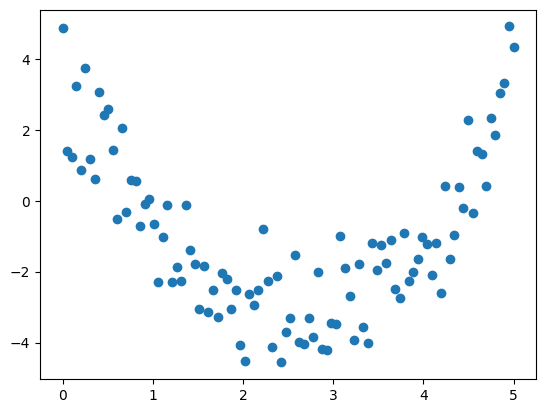

In [6]:
plt.scatter(x, t)

---

### 問3. `ndarray`の結合

以下の3つの`ndarray`を垂直方向に結合した2次元配列を転置した行列 `X` を定義しなさい．

- x0: 長さが `x` と同じで要素が全て1の`ndarray`
- x1: 観測値 `x` の各要素を1乗した`ndarray`
- x2: 観測値 `x` の各要素を2乗した`ndarray`

例： $x = (1, 2, 3)$ のとき，

$$
x_0 = (1, 1, 1)\\
x_1 = (1, 2, 3)\\
x_2 = (1, 4, 9)
$$

だから，

$$
X = \left(
\begin{array}{ccc}
    1 & 1 & 1 \\
    1 & 2 & 3 \\
    1 & 4 & 9
\end{array}
\right)^T
= \left(
\begin{array}{ccc}
    1 & 1 & 1 \\
    1 & 2 & 4 \\
    1 & 3 & 9
\end{array}
\right)
$$

ちなみに，機械学習では `X` のような行列を計画行列と呼びます．

In [7]:
x0 = np.ones((100,))
x1 = np.power(x,1)
x2 = np.power(x,2)


matrix = np.vstack((x0, x1, x2))
X = matrix.T
print(X)


[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 5.05050505e-02 2.55076013e-03]
 [1.00000000e+00 1.01010101e-01 1.02030405e-02]
 [1.00000000e+00 1.51515152e-01 2.29568411e-02]
 [1.00000000e+00 2.02020202e-01 4.08121620e-02]
 [1.00000000e+00 2.52525253e-01 6.37690032e-02]
 [1.00000000e+00 3.03030303e-01 9.18273646e-02]
 [1.00000000e+00 3.53535354e-01 1.24987246e-01]
 [1.00000000e+00 4.04040404e-01 1.63248648e-01]
 [1.00000000e+00 4.54545455e-01 2.06611570e-01]
 [1.00000000e+00 5.05050505e-01 2.55076013e-01]
 [1.00000000e+00 5.55555556e-01 3.08641975e-01]
 [1.00000000e+00 6.06060606e-01 3.67309458e-01]
 [1.00000000e+00 6.56565657e-01 4.31078461e-01]
 [1.00000000e+00 7.07070707e-01 4.99948985e-01]
 [1.00000000e+00 7.57575758e-01 5.73921028e-01]
 [1.00000000e+00 8.08080808e-01 6.52994592e-01]
 [1.00000000e+00 8.58585859e-01 7.37169677e-01]
 [1.00000000e+00 9.09090909e-01 8.26446281e-01]
 [1.00000000e+00 9.59595960e-01 9.20824406e-01]
 [1.00000000e+00 1.01010101e+00 1.020304

---

### 問4. 線形代数

観測値 `x, t` をもとに真の関数 `y` を2次関数で回帰しなさい．

任意の2次関数は $y(x) = w_0 + w_1 x + w_2 x^2$ と表すことができます．  
なので，パラメータのベクトル $\mathbf{w} = (w_0, w_1, w_2)$ を求めれば良いことになります．

これは以下の正規方程式から求めることができます．

$ \mathbf{w} = (X^T X)^{-1} X^T \mathbf{t} $

この式の導出はdev_data勉強会で学びます．

行列の積が多い場合は`np.dot`を使わない方が簡潔に書けます．

In [8]:
a = np.dot(X.T, X)
a_inv = np.linalg.inv(a)
b = np.dot(a_inv,X.T)
w = np.dot(b,t)
print(w)
w0 = 4.06308395
w1 = -6.09546501
w2 =  1.20719993
pred_y = w0 + w1 * x + w2 * x ** 2

[ 3.65314901 -5.45759062  1.06839543]


---

### 結果

先ほどのグラフに真の関数(緑)と回帰曲線(赤)を重ねると以下のようになります．

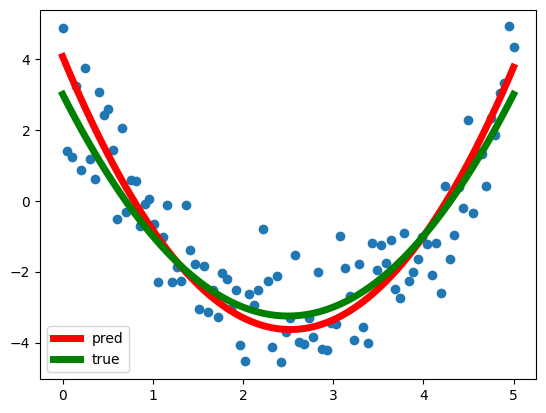

In [9]:
plt.scatter(x, t)
plt.plot(x, pred_y, linewidth=5, color="red", label="pred")
plt.plot(x, y(x), linewidth=5, color="green", label="true")
plt.legend()

今回使った手法は 真の関数 `y` の定義を変更するとその他のコードを全く変更しなくても同様に回帰することができます．

例えば以下のように変更したらその関数を回帰します．

```python
def y(x):
    """真の関数"""
    return 5 * np.sin(np.pi * x / 5)
```
dev_data勉強会で詳しくやりますが，この回帰曲線の表現力は2次までです．
カーブが2つ以上の曲線を回帰したい場合は問3の計画行列の列数を　`x3, x4...`　のように増やせば表現力が上がります．